# **DIAGNÓSTICO PRECOZ DE PACIENTES CON DEPRESIÓN O BIPOLARIDAD TIPO 1/2**

## PROBLEMA DE NEGOCIO

Queremos resolver un problema cada vez más acuciante en nuestra sociedad: por qué se desarrollan enfermedades como la depresión o la bipolaridad tipo 1/2, cuáles son los factores que determinan la aparición de una u otra enfermedad y cómo podemos predecir si una persona las desarrollará en el futuro, para poder evitarlo. 

1. La **depresión** es un trastorno del estado de ánimo que causa sentimientos persistentes de tristeza y una pérdida de interés en realizar actividades cotidianas. 
2. La **bipolaridad** es un trastorno del estado de ánimo que se caracteriza por la alternancia entre episodios de depresión y manía. Existen dos subtipos principales:
   1. Trastorno Bipolar Tipo I: tiene al menos un episodio maníaco en el pasado o presente, los episodios maníacos son de mayor gravedad y pueden incluir síntomas psicóticos y puede alternar con episodios de depresión.
   2. Trastorno Bipolar Tipo II: tiene mínimo una fase hipomaníaca (menos intensa que la manía) y una fase depresiva, nunca ha tenido un episodio maníaco completo y siempre existe depresión cuya duración es superior a la del tipo I.

Como podemos observar estas enfermedades están relacionadas entre sí. Sin embargo, aunque tener bipolaridad suele implicar padecer también depresión; padecer depresión, no implica padecer bipolaridad.

## PROBLEMA TÉCNICO

Para resolver el problema, tomamos como datos un dataset basado en un test que se le hizo a 120 pacientes, en el cual los pacientes debían responder con sí o no a preguntas tales como si padecían anorexia, si tenían pensamientos suicidas o conductas agresivas, entre otra; o responder a la frecuencia con la que experimentaban tristeza, euforia, cansancio, desórdenes del sueño, etc. En base a sus respuestas, se calificaba si el paciente padecía depresión, bipolaridad tipo 1 ó 2, o por si, por el contrario, no padecía ninguna enfermedad. Con este conjunto de datos, necesitamos crear un modelo predictor que nos ayude a identificar si las personas padecerán alguna de estas enfermedades en el futuro y así poder poner en marcha las medidas necesarias para evitarlo.

### **PARTE 1: CARGA DE DATOS Y LIMPIEZA**

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv('./data/Dataset-Mental-Disorders.csv')


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [130]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


En este dataset tenemos diferentes tipos de variables: categóricas (sadness, euphoric, exhaustes y sleep disorder, sexual activity, concentration, optimism, expert diagnose) y variables booleanas (mood swing, suicidadal thougths, anorxia, authority respect, try-explanation, agressive-response, admit mistakes, overthinking).

Primero asignamos valores numéricos a las columnas.

In [131]:
#Pasamos a numeros las variables categoricas
df['Sadness'].replace(('Usually', 'Most-Often', 'Sometimes', 'Seldom'), (3, 2, 1, 0), inplace=True)
df['Euphoric'].replace(('Usually', 'Most-Often', 'Sometimes', 'Seldom'), (3, 2, 1, 0), inplace=True)
df['Exhausted'].replace(('Usually', 'Most-Often', 'Sometimes', 'Seldom'), (3, 2, 1, 0), inplace=True)
df['Sleep dissorder'].replace(('Usually', 'Most-Often', 'Sometimes', 'Seldom'), (3, 2, 1, 0), inplace=True)
df['Expert Diagnose'].replace(('Depression', 'Bipolar Type-1', 'Bipolar Type-2', 'Normal'), (3, 2, 1, 0), inplace=True)
df['Concentration'].replace(('1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10', '6 From 10, 7 From 10', '8 From 10', '9 From 10'), (1, 2, 3, 4, 5, 6, 7, 8),  inplace=True)
df['Sexual Activity'].replace(('1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10', '6 From 10, 7 From 10', '8 From 10', '9 From 10'), (1, 2, 3, 4, 5, 6, 7, 8), inplace=True)
df['Optimisim'].replace(('1 From 10', '2 From 10', '3 From 10', '4 From 10', '5 From 10', '6 From 10, 7 From 10', '8 From 10', '9 From 10'), (1, 2, 3, 4, 5, 6, 7, 8), inplace=True)


In [132]:
#Pasamos a numeros las variables booleanas
df['Anorxia'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Mood Swing'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Suicidal thoughts'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Authority Respect'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Try-Explanation'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Aggressive Response'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Ignore & Move-On'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Nervous Break-down'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Admit Mistakes'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Overthinking'].replace(('YES', 'NO'), (1, 0), inplace=True)
df['Suicidal thoughts'].replace(('YES '), (1), inplace=True)

In [133]:
#pasamos a numeros las variables que contengan x numero, porque de primeras no se habian convertido
df['Concentration'] = df['Concentration'].replace(r'.*6.*', 6, regex=True)
df['Concentration'] = df['Concentration'].replace(r'.*7.*', 7, regex=True)
df['Sexual Activity'] = df['Sexual Activity'].replace(r'.*6.*', 6, regex=True)
df['Sexual Activity'] = df['Sexual Activity'].replace(r'.*7.*', 7, regex=True)
df['Optimisim'] = df['Optimisim'].replace(r'.*6.*', 6, regex=True)
df['Optimisim'] = df['Optimisim'].replace(r'.*7.*', 7, regex=True)

In [134]:
#eliminamos la columna patient number
df.drop(columns=["Patient Number"], inplace=True)


In [135]:
#cambiamos el tipo de objeto de las variables a int
df = df.astype(int)


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sadness              120 non-null    int32
 1   Euphoric             120 non-null    int32
 2   Exhausted            120 non-null    int32
 3   Sleep dissorder      120 non-null    int32
 4   Mood Swing           120 non-null    int32
 5   Suicidal thoughts    120 non-null    int32
 6   Anorxia              120 non-null    int32
 7   Authority Respect    120 non-null    int32
 8   Try-Explanation      120 non-null    int32
 9   Aggressive Response  120 non-null    int32
 10  Ignore & Move-On     120 non-null    int32
 11  Nervous Break-down   120 non-null    int32
 12  Admit Mistakes       120 non-null    int32
 13  Overthinking         120 non-null    int32
 14  Sexual Activity      120 non-null    int32
 15  Concentration        120 non-null    int32
 16  Optimisim            120 n

In [137]:
#comprobacion de que el dataset completo solo tiene numeros y podemos empezar a trabajar con el
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,1
1,3,0,3,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,2,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,2
3,3,0,3,2,1,1,1,0,1,0,0,0,0,0,3,2,2,1
4,3,3,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0
5,3,1,1,2,0,1,1,1,0,0,0,0,1,0,3,5,5,3
6,0,3,0,1,1,1,1,0,1,1,0,1,1,1,7,2,8,2
7,3,1,1,1,0,0,0,0,1,0,0,0,0,1,5,5,5,0
8,2,0,2,3,1,1,1,0,1,1,0,1,0,0,7,2,3,1
9,3,0,2,1,0,0,0,0,1,0,0,1,1,1,3,4,2,3


In [138]:
df.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.733333,1.025000,1.666667,1.566667,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.633333,4.216667,4.383333,1.500000
std,1.082584,1.064811,1.047874,1.082584,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,1.842237,1.735363,1.847930,1.130182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,1.000000
75%,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,8.000000,3.000000


### **PARTE 2: MINI EDA**

Ahora haremos un análisis gráfico de las diferentes variables y observaremos cómo influyen en el target. El target elegido es la variable "Expert Diagnose".

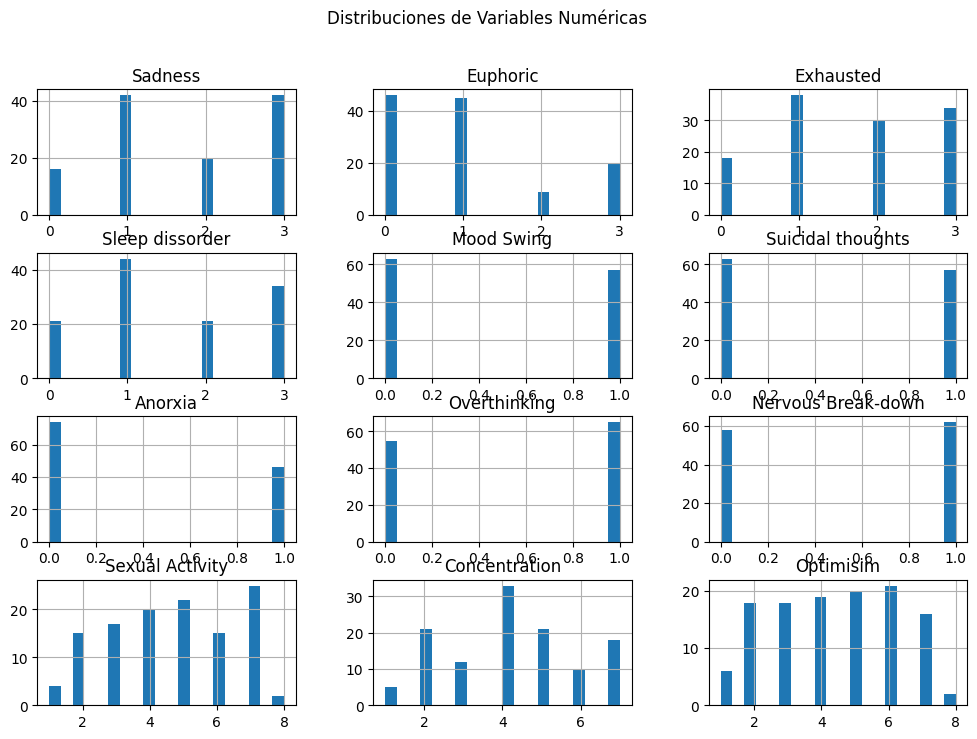

In [139]:
numeric_vars = ["Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing", "Suicidal thoughts", "Anorxia", "Overthinking", "Nervous Break-down", "Sexual Activity", "Concentration", "Optimisim"]
df[numeric_vars].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()

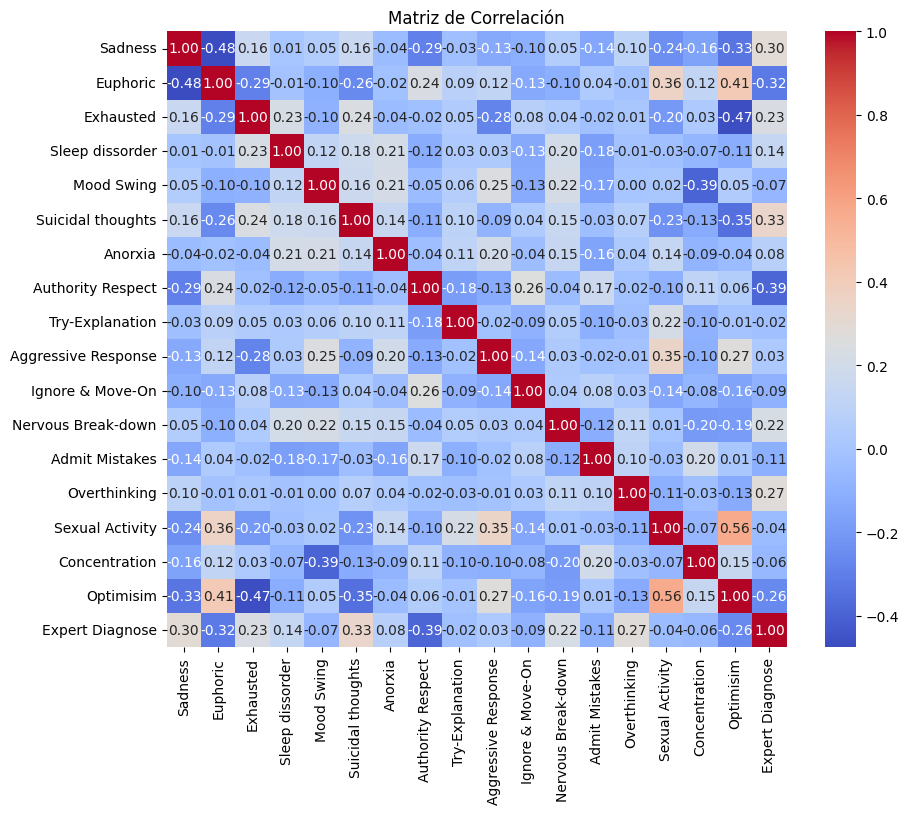

In [140]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

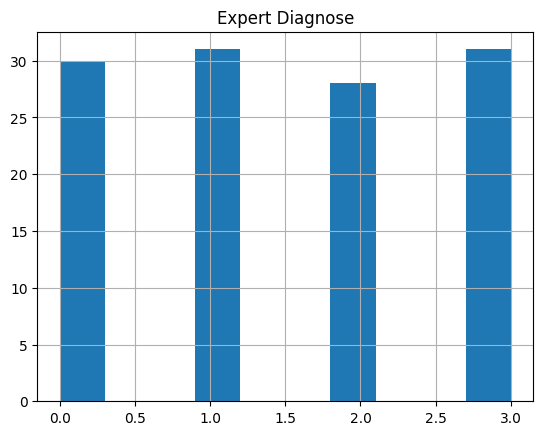

In [141]:
df.hist(column='Expert Diagnose')
plt.show()

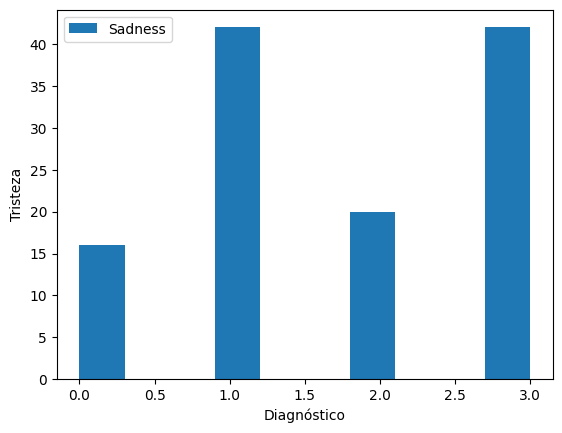

In [142]:
df.plot(x='Expert Diagnose', y='Sadness', kind='hist')
plt.xlabel('Diagnóstico')
plt.ylabel('Tristeza')
plt.title('')
plt.show()

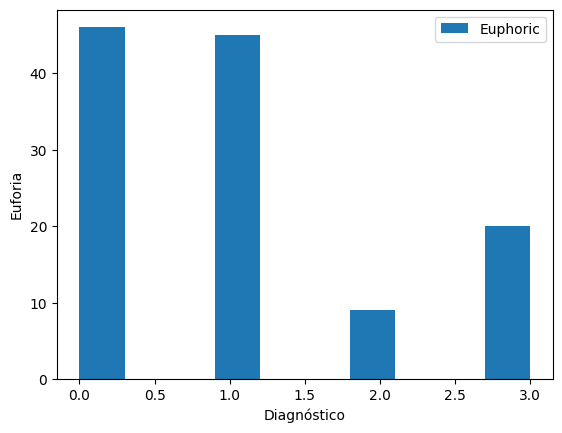

In [143]:
df.plot(x='Expert Diagnose', y='Euphoric', kind='hist')
plt.xlabel('Diagnóstico')
plt.ylabel('Euforia')
plt.title('')
plt.show()

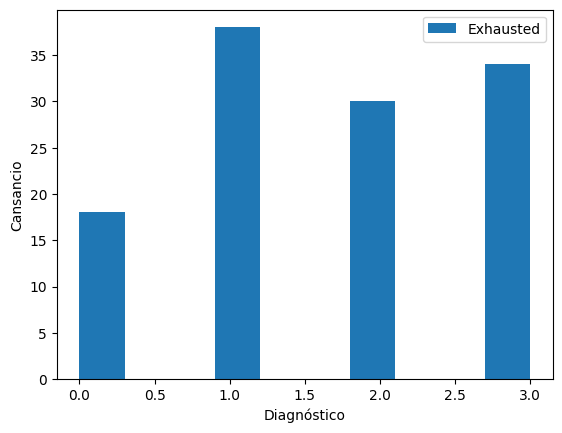

In [144]:
df.plot(x='Expert Diagnose', y='Exhausted', kind='hist')
plt.xlabel('Diagnóstico')
plt.ylabel('Cansancio')
plt.title('')
plt.show()

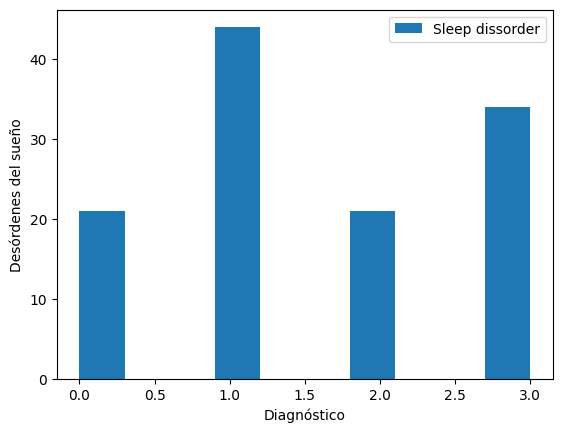

In [145]:
df.plot(x='Expert Diagnose', y='Sleep dissorder', kind='hist')
plt.xlabel('Diagnóstico')
plt.ylabel('Desórdenes del sueño')
plt.title('')
plt.show()

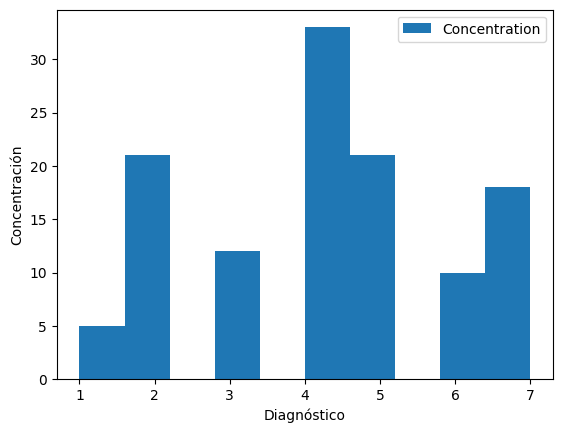

In [146]:
df.plot(x='Expert Diagnose', y='Concentration', kind='hist')
plt.xlabel('Diagnóstico')
plt.ylabel('Concentración')
plt.title('') 
plt.show()

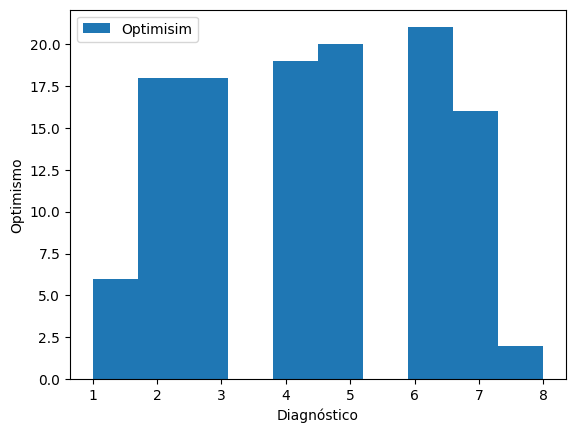

In [147]:
df.plot(x='Expert Diagnose', y='Optimisim', kind='hist')
plt.xlabel('Diagnóstico')
plt.ylabel('Optimismo')
plt.title('')
plt.show()

### **PARTE 3: CREACIÓN DE MODELOS**

El siguiente paso es la elección del mejor modelo que resuelva nuestro problema de negocio. Para ello crearemos y entrenaremos los siguientes modelos: Random Forest, Árbol de decisión, Regresión Logística, KNN y XGBoost. Compararemos su precisión y sensibilidad, y en el caso de que no haya un modelo que destaque sobre los demás, probaremos a hacer un ensamblado para mejorar el rendimiento.

In [148]:
#dividimos el dataset y el target
X = df.drop(columns=['Expert Diagnose'])  
y = df['Expert Diagnose']  

#dividimos los datos en conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#estandarizaramos caracteristicas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **MODELO 1: RANDOM FOREST**

In [164]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="accuracy")
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
best_rf_model

RandomForestClassifier(random_state=42)

In [155]:
rf_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      1.00      1.00         5
           2       0.75      0.75      0.75         4
           3       0.78      0.88      0.82         8

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.84        24
weighted avg       0.84      0.83      0.83        24



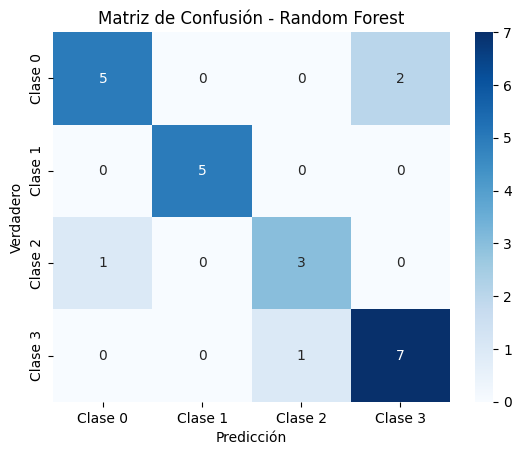

In [168]:
rf_pred = best_rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

Random Forest tiene una accuracy del 83%.

#### **MODELO 2: ÁRBOL DE DECISIÓN**

In [163]:
dt_model = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
dt_grid = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring="accuracy")
dt_grid.fit(X_train, y_train)
best_dt_model = dt_grid.best_estimator_
best_dt_model

DecisionTreeClassifier(min_samples_split=5, random_state=42)

In [156]:
dt_pred = best_dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))



Decision Tree Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       1.00      0.80      0.89         5
           2       0.50      0.75      0.60         4
           3       1.00      0.75      0.86         8

    accuracy                           0.79        24
   macro avg       0.81      0.79      0.79        24
weighted avg       0.84      0.79      0.80        24



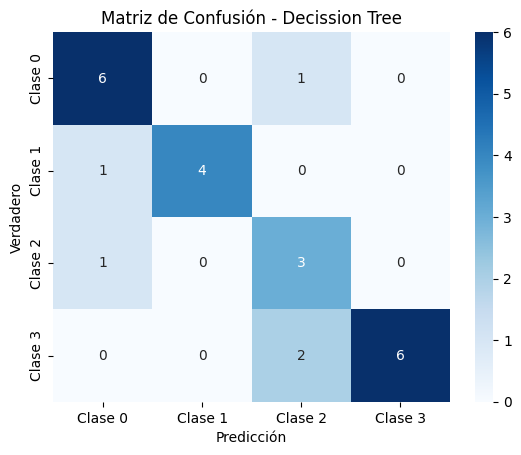

In [186]:
dt_pred = best_dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, dt_pred)

sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Decission Tree")
plt.show()

Árbol de decisión tiene una accuracy del 79%.

#### **MODELO 3: REGRESIÓN LOGÍSTICA**

In [165]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid_logistic = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"]
}
logistic_grid = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring="accuracy")
logistic_grid.fit(X_train, y_train)
best_logistic_model = logistic_grid.best_estimator_
best_logistic_model

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [157]:
logistic_pred = best_logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("\nLogistic Regression Accuracy:", logistic_accuracy)
print(classification_report(y_test, logistic_pred))



Logistic Regression Accuracy: 0.7916666666666666
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       1.00      0.60      0.75         5
           2       0.75      0.75      0.75         4
           3       0.80      1.00      0.89         8

    accuracy                           0.79        24
   macro avg       0.82      0.77      0.78        24
weighted avg       0.81      0.79      0.79        24



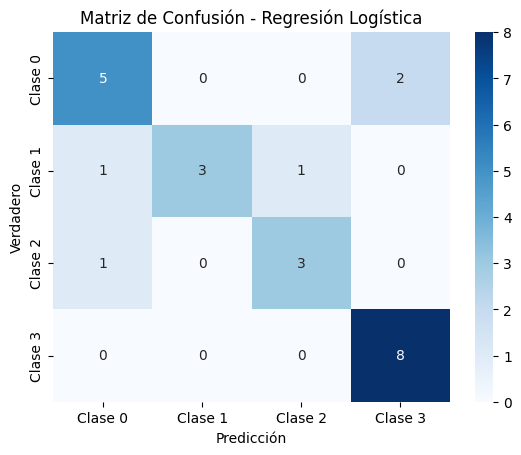

In [187]:
logistic_pred = best_logistic_model.predict(X_test)
cm_logistic = confusion_matrix(y_test, logistic_pred)

sns.heatmap(cm_logistic, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

Regresión logística tiene una accuracy del 79%.

#### **MODELO 4: KNN**

In [166]:
knn_model = KNeighborsClassifier()
param_grid_knn = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"]
}
knn_grid = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)
best_knn_model = knn_grid.best_estimator_
best_knn_model

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [158]:
knn_pred = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("\nK-Nearest Neighbors Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_pred))



K-Nearest Neighbors Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.75      0.60      0.67         5
           2       0.75      0.75      0.75         4
           3       0.60      0.75      0.67         8

    accuracy                           0.67        24
   macro avg       0.69      0.67      0.67        24
weighted avg       0.68      0.67      0.67        24



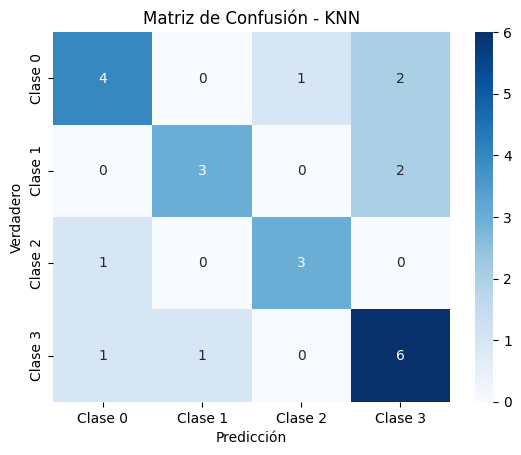

In [188]:
knn_pred = best_knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, knn_pred)

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - KNN")
plt.show()

KNN tiene una accuracy del 66%.

#### **MODELO 5: XGBOOST**

In [167]:
xgb_model = XGBClassifier(random_state=42)
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}
xgb_grid = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring="accuracy")
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [159]:
xgb_pred = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("\nXGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_pred))



XGBoost Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         4
           3       0.80      1.00      0.89         8

    accuracy                           0.83        24
   macro avg       0.87      0.80      0.81        24
weighted avg       0.85      0.83      0.82        24



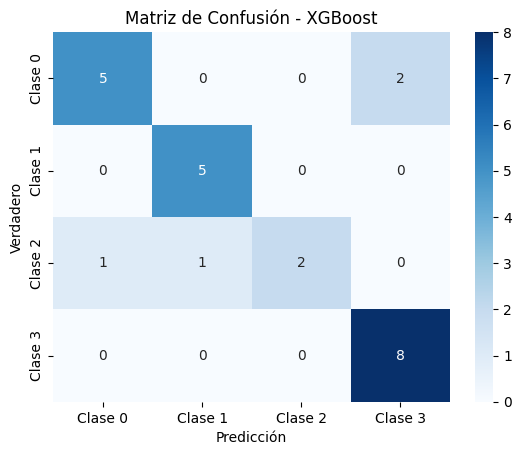

In [189]:
xgb_pred = best_xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, xgb_pred)

sns.heatmap(cm_xgb, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - XGBoost")
plt.show()

XGBoost tiene una accuracy del 83%.

#### **ENSAMBLADOS**

Debido a que los modelos de Random Forest y XGBoost son los que tienen el accuracy más alto (83%), haré un ensamblado para ver si así mejoro el rendimiento.

##### **RANDOM FOREST & XGBOOST**

Ensemble Model Accuracy: 0.79


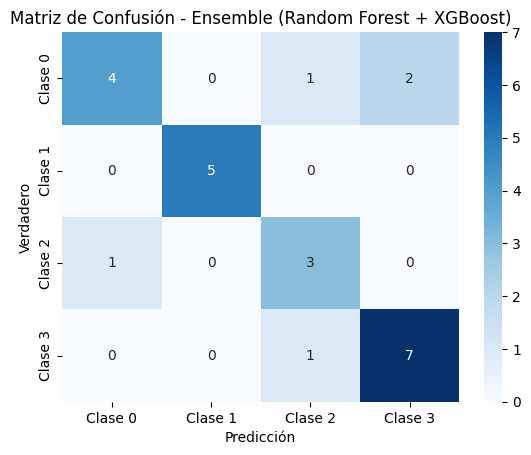

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       1.00      1.00      1.00         5
           2       0.60      0.75      0.67         4
           3       0.78      0.88      0.82         8

    accuracy                           0.79        24
   macro avg       0.79      0.80      0.79        24
weighted avg       0.80      0.79      0.79        24



In [177]:
#creamos un clasificador de votación
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

#entrenamos el modelo ensemble en los datos de train
voting_model.fit(X_train, y_train)

#realizamos predicciones en los datos de prueba
y_pred_ensemble = voting_model.predict(X_test)

#calculamos el accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

#creamos la matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Ensemble (Random Forest + XGBoost)")
plt.show()

#mostramos el informe de clasificación
print(classification_report(y_test, y_pred_ensemble))


Al hacer el ensamblado de ambos modelos, el accuracy baja al 79%, con lo cual haré más ensamblados con otros modelos para ver si con alguno mejoro el rendimiento.

##### **RANDOM FOREST & REGRESIÓN LOGÍSTICA**

Ensemble Model Accuracy: 0.83


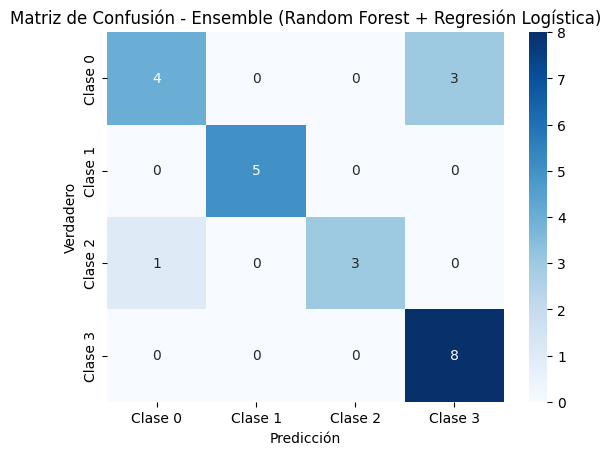

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       1.00      1.00      1.00         5
           2       1.00      0.75      0.86         4
           3       0.73      1.00      0.84         8

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.84        24
weighted avg       0.85      0.83      0.83        24



In [181]:
#creamos un clasificador de votación
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('logistic', logistic_model)], voting='soft')

#entrenamos el modelo ensemble en los datos de train
voting_model.fit(X_train, y_train)

#realizamos predicciones en los datos de prueba
y_pred_ensemble = voting_model.predict(X_test)

#calculamos el accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

#creamos la matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Ensemble (Random Forest + Regresión Logística)")
plt.show()

#mostramos el informe de clasificación
print(classification_report(y_test, y_pred_ensemble))


##### **RANDOM FOREST & ÁRBOL DE DECISIÓN**

Ensemble Model Accuracy: 0.79


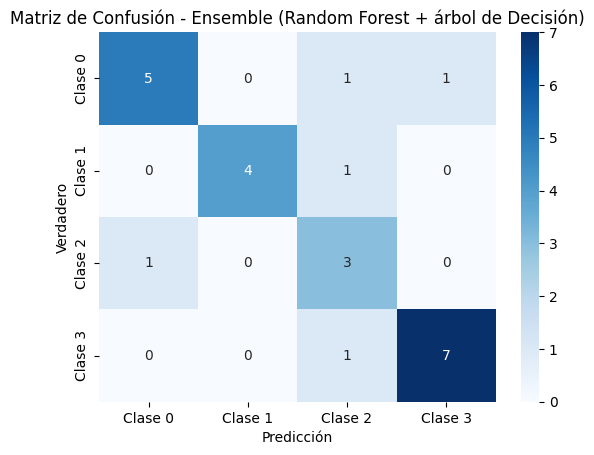

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      0.80      0.89         5
           2       0.50      0.75      0.60         4
           3       0.88      0.88      0.88         8

    accuracy                           0.79        24
   macro avg       0.80      0.78      0.78        24
weighted avg       0.83      0.79      0.80        24



In [182]:
#creamos un clasificador de votación
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('dt', dt_model)], voting='soft')

#entrenamos el modelo ensemble en los datos de train
voting_model.fit(X_train, y_train)

#realizamos predicciones en los datos de prueba
y_pred_ensemble = voting_model.predict(X_test)

#calculamos el accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

#creamos la matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Ensemble (Random Forest + árbol de Decisión)")
plt.show()

#mostramos el informe de clasificación
print(classification_report(y_test, y_pred_ensemble))


##### **XGBOOST & REGRESIÓN LOGÍSTICA**

Ensemble Model Accuracy: 0.83


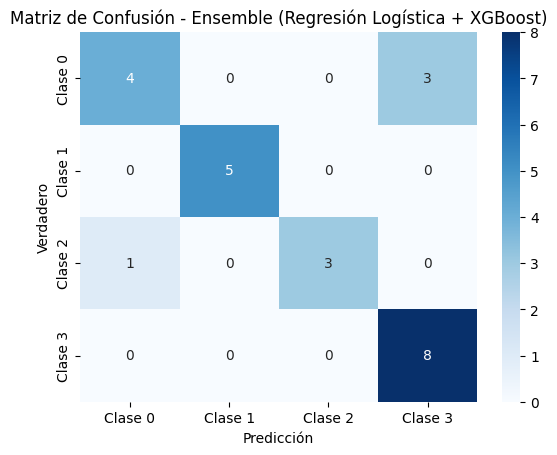

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       1.00      1.00      1.00         5
           2       1.00      0.75      0.86         4
           3       0.73      1.00      0.84         8

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.84        24
weighted avg       0.85      0.83      0.83        24



In [183]:
#creeamos un clasificador de votación
voting_model = VotingClassifier(estimators=[('logistic', logistic_model), ('xgb', xgb_model)], voting='soft')

#entrenamos el modelo ensemble en los datos de train
voting_model.fit(X_train, y_train)

#realizamos predicciones en los datos de prueba
y_pred_ensemble = voting_model.predict(X_test)

#calculamos el accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

#creamos la matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Ensemble (Regresión Logística + XGBoost)")
plt.show()

#mostramos el informe de clasificación
print(classification_report(y_test, y_pred_ensemble))


##### **XGBOOST & ÁRBOL DE DECISIÓN**

Ensemble Model Accuracy: 0.79


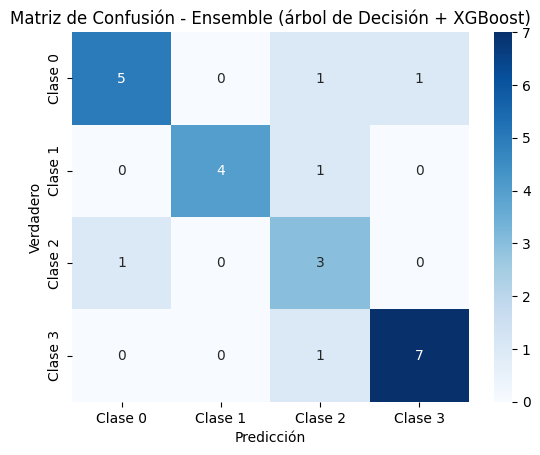

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      0.80      0.89         5
           2       0.50      0.75      0.60         4
           3       0.88      0.88      0.88         8

    accuracy                           0.79        24
   macro avg       0.80      0.78      0.78        24
weighted avg       0.83      0.79      0.80        24



In [184]:
#creamos un clasificador de votación
voting_model = VotingClassifier(estimators=[('dt', dt_model), ('xgb', xgb_model)], voting='soft')

#entrenamos el modelo ensemble en los datos de entrenamiento
voting_model.fit(X_train, y_train)

#realizamos predicciones en los datos de prueba
y_pred_ensemble = voting_model.predict(X_test)

#calculamos el accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

#creamos la matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Ensemble (árbol de Decisión + XGBoost)")
plt.show()

#mostramos el informe de clasificación
print(classification_report(y_test, y_pred_ensemble))


##### **ÁRBOL DE DECISIÓN & REGRESIÓN LOGÍSTICA**

Ensemble Model Accuracy: 0.79


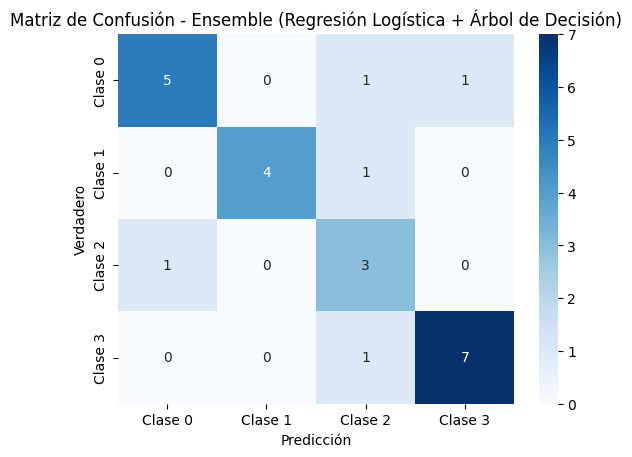

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      0.80      0.89         5
           2       0.50      0.75      0.60         4
           3       0.88      0.88      0.88         8

    accuracy                           0.79        24
   macro avg       0.80      0.78      0.78        24
weighted avg       0.83      0.79      0.80        24



In [185]:
#creamos un clasificador de votación (soft voting)
voting_model = VotingClassifier(estimators=[('logistic', logistic_model), ('dt', dt_model)], voting='soft')

#entrenamos el modelo ensemble en los datos de train
voting_model.fit(X_train, y_train)

#realizamos predicciones en los datos de prueba
y_pred_ensemble = voting_model.predict(X_test)

#calculamos el accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

#creamos la matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, cmap="Blues", fmt="d", xticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"], yticklabels=["Clase 0", "Clase 1", "Clase 2", "Clase 3"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Ensemble (Regresión Logística + Árbol de Decisión)")
plt.show()

#mostramos el informe de clasificación
print(classification_report(y_test, y_pred_ensemble))


Finalmente, debido a que los ensamblados de modelos no mejoran la exactitud, sino que la empeoran o no hay diferencia, es mejor elegir un modelo. He elegido el Random Forest porque tanto la precisión como el recall, asi como el F1-Score es mayor de 70% en todos los casos, y en el modelo XGBoost, el F1-Score del caso 2 es del 67%, ya que el recall es solo del 50%.

### **PARTE 4: GRABACIÓN DEL MODELO RANDOM FOREST EN JOBLIB**

In [190]:
import joblib
from sklearn.ensemble import RandomForestClassifier

In [191]:
joblib.dump(rf_model, 'modelo_random_forest.joblib')

['modelo_random_forest.joblib']